# Bay Wheels Dataset Exploration
## by Brad DeFauw

## Preliminary Wrangling

> This dataset captures trip data for the company Bay Wheels, formerly known as Ford GoBike, a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate, in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. This dataset does an excellent job shedding light on a variety of data, including: 
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

In [139]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [140]:
bikes = pd.read_csv('2017-fordgobike-tripdata.csv')
print(bikes.shape)
print(bikes.dtypes)
bikes['duration_min'] = bikes['duration_sec'] / 60
bikes['duration_hr'] = bikes['duration_min'] / 60
bikes['age'] = 2017 - bikes['member_birth_year']
bikes.head()

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,duration_hr,age
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,22.252778,30.0
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,21.888889,52.0
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,762.800000,12.713333,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,1036.200000,17.270000,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667,12.111944,20.0


In [141]:
short_ride = bikes[bikes['duration_min'] < 61]
short_ride.head()
print(short_ride.describe())
print(short_ride.shape)

        duration_sec  start_station_id  start_station_latitude  \
count  503704.000000     503704.000000           503704.000000   
mean      712.752795         95.005743               37.771706   
std       501.635151         85.681287                0.085832   
min        61.000000          3.000000               37.317298   
25%       376.000000         24.000000               37.773492   
50%       581.000000         67.000000               37.782411   
75%       892.000000        138.000000               37.795392   
max      3659.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            503704.000000   503704.000000         503704.000000   
mean               -122.364159       92.057081             37.771869   
std                   0.105100       84.445283              0.085741   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.00000

In [146]:
short_ride_new = short_ride[short_ride.age < 68].copy()
short_ride_new.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,duration_hr,age
285378,1144,2017-10-02 18:32:25.8000,2017-10-02 18:51:30.6700,90,Townsend St at 7th St,37.771058,-122.402717,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2794,Subscriber,1992.0,Male,19.066667,0.317778,25.0
71694,404,2017-12-05 16:43:30.9260,2017-12-05 16:50:15.7330,129,Harrison St at 20th St,37.758862,-122.412544,223,16th St Mission BART Station 2,37.764765,-122.420091,2078,Subscriber,1978.0,Male,6.733333,0.112222,39.0
420766,655,2017-08-21 19:37:15.5440,2017-08-21 19:48:10.7760,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,58,Market St at 10th St,37.776619,-122.417385,1991,Subscriber,1994.0,Male,10.916667,0.181944,23.0
363654,1555,2017-09-09 16:16:45.4080,2017-09-09 16:42:40.7600,70,Central Ave at Fell St,37.773311,-122.444293,120,Mission Dolores Park,37.761420,-122.426435,1775,Customer,1996.0,Male,25.916667,0.431944,21.0
348574,717,2017-09-14 09:32:16.6900,2017-09-14 09:44:13.9890,66,3rd St at Townsend St,37.778742,-122.392741,9,Broadway at Battery St,37.798572,-122.400869,122,Subscriber,1986.0,Male,11.950000,0.199167,31.0


Because of outliers for age, I created another dataset that limits the age.

### What is the structure of your dataset?

> This dataset had 15 columns and 519,700 rows, originally. However, upon inspection of the data I realized that I only wanted to do analysis of "normal" ride lengths, so I created a new dataset that only included rides of 60 minutes or shorter. I also added in columns for duration in minutes and hours, and age. The final dataset contains 18 columns and 503,704 rows.

### What is/are the main feature(s) of interest in your dataset?

> This dataset features information surrounding the duration of a ride, start and end stations of a ride, bike identification, as well as user data.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'm particularly interested in user features in this data. Are bikes used more by men or women? What age range? How do these features impact the length of a ride? I will be exploring these questions and more throughout my analysis.

## Univariate Exploration

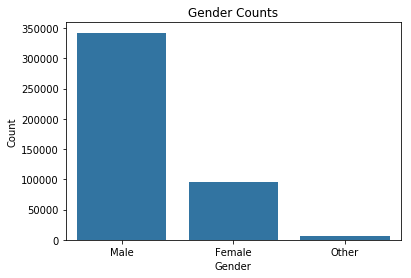

In [147]:
base_color = sb.color_palette()[0]
sb.countplot(data = short_ride_new, x = 'member_gender', color = base_color);
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Counts');

Here, we can see that the overwhelming majority of users were male.

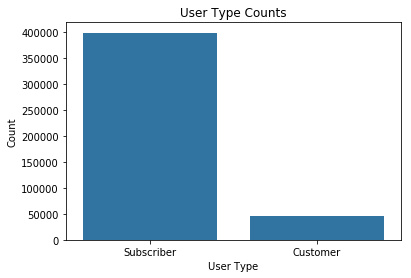

In [148]:
base_color = sb.color_palette()[0]
sb.countplot(data = short_ride_new, x = 'user_type', color = base_color);
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('User Type Counts');

Here, we can see that the overwhelming majority of users are subscribers as opposed to one time customers.

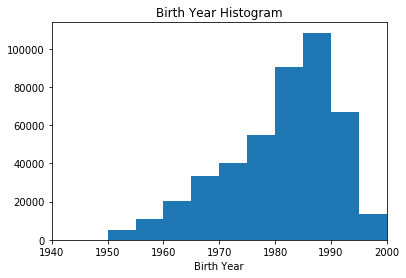

In [149]:
bins = np.arange(0, short_ride_new['member_birth_year'].max()+5, 5)
plt.hist(data = short_ride_new, x = 'member_birth_year', bins = bins);
plt.xlim((1940,2000))
plt.xlabel('Birth Year')
plt.title('Birth Year Histogram');

Here, we can see a unimodal histogram, with most users' birth years occuring between 1985 and 1990. This graph also shows significant left skew.

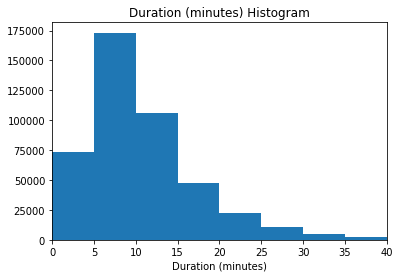

In [150]:
bins = np.arange(0, short_ride_new['duration_min'].max()+5, 5)
plt.hist(data = short_ride_new, x = 'duration_min', bins = bins);
plt.xlabel('Duration (minutes)')
plt.title('Duration (minutes) Histogram')
plt.xlim(0, 40);

Here, we can see a unimodal histogram, with most users' ride duration occuring between 5 and 10 minutes. This graph also shows significant right skew.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For birth year, there were a few unusual points - the minimum birth year occurred in 1886, which doesn't seem to make much scientific sense. Combining that with a few outliers, I only looked at a section of the data on the birth year histogram, starting with the year 1940 and ending with the year 2000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For these plots, I did not notice any unusual distributions outside of what I wrote about above. The only thing that comes to mind is the "other" category for member_gener, but I did not feel it was necessary to tidy, adjust or change the form of the data, due to the small number of users who identified as "other".

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

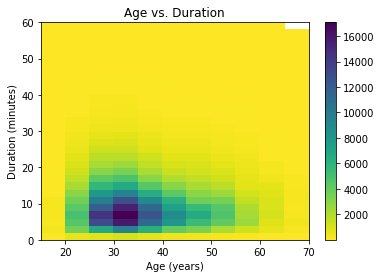

In [153]:
bins_x = np.arange(15, 131+5, 5)
bins_y = np.arange(0, 60+2, 2)
plt.hist2d(data = short_ride_new, x = 'age', y = 'duration_min', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Age (years)')
plt.ylabel('Duration (minutes)')
plt.title('Age vs. Duration')
plt.xlim(15,70);

When conducting a bivariate exploration of the data, I initially thought to do a scatterplot of the data. However, due to overplotting it appears that a heat map would be more appropriate for this data. As evidenced, the largest number of rides are happening for users between 25-35 years old at a duration of 5-15 minutes long, with the most users appearing to be just over 30 years old for between 5-10 minutes of ride time. It is interesting to wonder about how this data might look if broken down by gender - a topic that deserves a further look in the next section.

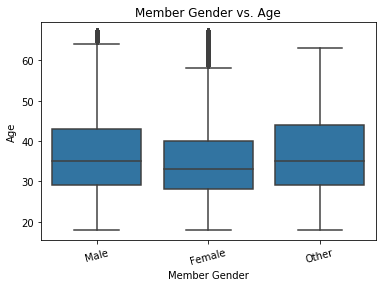

In [164]:
base_color = sb.color_palette()[0]
sb.boxplot(data = short_ride_new, x = 'member_gender', y = 'age', color = base_color);
plt.xticks(rotation=15)
plt.xlabel('Member Gender')
plt.ylabel('Age')
plt.title('Member Gender vs. Age');

Average ages seem to be relatively constant across genders, with males showing a slightly higher average age than females, and males showing about an equivalent average age to those who identified as an "other" gender.

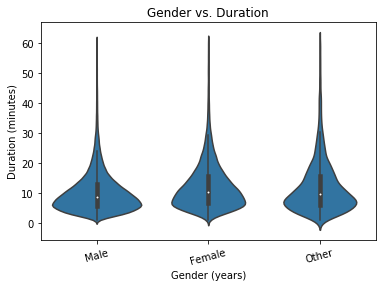

In [162]:
base_color = sb.color_palette()[0]
sb.violinplot(data = short_ride_new, x = 'member_gender', y = 'duration_min', color = base_color);
plt.xticks(rotation=15)
plt.xlabel('Gender (years)')
plt.ylabel('Duration (minutes)')
plt.title('Gender vs. Duration');

Interestingly, it appears that the gender of our users does not have much of an impact on how long a user is riding for. Regardless of if a male, female or other is riding, the average ride time and distribution of those ride times appears to be the same for each gender - just under 10 minutes of riding.

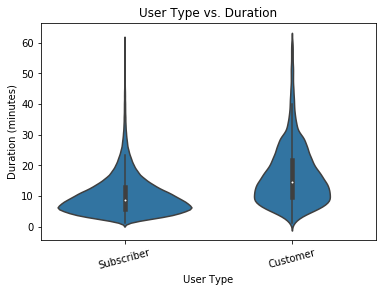

In [165]:
base_color = sb.color_palette()[0]
sb.violinplot(data = short_ride_new, x = 'user_type', y = 'duration_min', color = base_color);
plt.xticks(rotation=15)
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title('User Type vs. Duration');

The violin plots above show that there may be a relationship between user type and duration, with single time customer rides averaging around 15 minutes while subscriber times are closer to 10 minutes. This makes me wonder if this is true for all genders, or does one in particular skew the data?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Age seemed to have a significant impact on the duration of bike rides, while gender did not. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> At this time, I am focusing on the features of interest, so I did not observe any other interesting relationships between the other features of the dataset.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

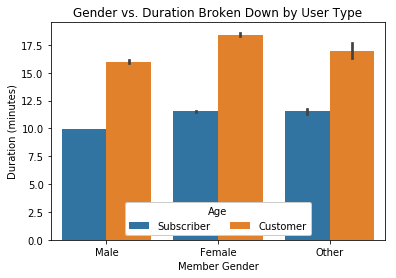

In [156]:
ax = sb.barplot(data = short_ride_new, x = 'member_gender', y = 'duration_min', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Age')
plt.xlabel('Member Gender')
plt.ylabel('Duration (minutes)')
plt.title('Gender vs. Duration Broken Down by User Type');

We notice here that regardless of gender - male, female or other - average trip duration is significantly higher for customers than it is for subscibers.

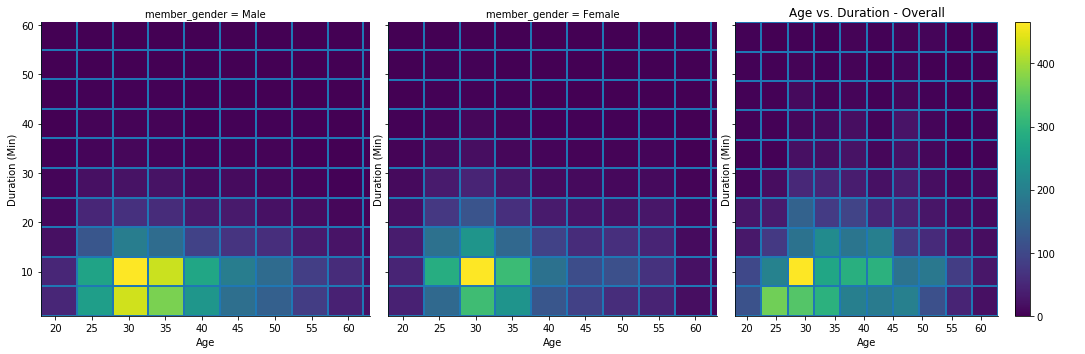

In [161]:
g = sb.FacetGrid(data = short_ride_new, col = 'member_gender', height = 5)
g.map(plt.hist2d, 'age', 'duration_min')
g.add_legend()
g.set(xlabel = "Age", ylabel = "Duration (Min)")
plt.colorbar()
plt.title('Age vs. Duration - Overall');

In this set of heat maps, we notice the following relationships: there seem to be more older men who are using the bicycles for longer. The heat map furthest to the left suggests there are significant numbers of men above the age of thirty who are renting the bicycles; however, for females, there is one cross-section that stands out the most - age 30, duration of 10 minutes is by far the most users for females. While this is also the most common ride age and duration for males, it does not stick out nearly as it does for female riders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> These multivariate explorations shed light on a couple different ideas. One, regardless of gender, we can say with certaintly that all genders showed a higher average ride duration for customers than for subscription users. Secondly, we notice that when it comes to gender, there is a bit more distribtuion for age and ride time for males than there are for females, who are much more centered on the age of 30 and ride duration of 10 minutes.

### Were there any interesting or surprising interactions between features?

> The interaction that was most surprising for me was the gender breakdown in ride duration, as well as the age of all participants. It was a bit surprising to me that the "average" age for a user was 30, as I was expecting that number to be a bit lower to match a younger and stereotypically more active and less financially stable age group. To me, it seemed that the ride share option would be appealing to a younger age - maybe closer to 25 - for those reasons. I was also surprised that the female data was more centered around the age of 30 than men, and that the most men who were using the bikes were age 30, especially considering our earlier plot that showed that men's average age was higher than women's in this dataset.